# 言語処理100本ノック 2015

http://www.cl.ecei.tohoku.ac.jp/nlp100/

言語処理100本ノックは，実践的な課題に取り組みながら，プログラミング，データ分析，研究のスキルを楽しく習得することを目指した問題集です

* 実用的でワクワクするような題材を厳選しました
* 言語処理に加えて，統計や機械学習などの周辺分野にも親しめます
* 研究やデータ分析の進め方，作法，スキルを修得できます
* 問題を解くのに必要なデータ・コーパスを配布しています
* 言語はPythonを想定していますが，他の言語にも対応しています


## 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．


### 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [57]:
nekoMorphList = list()
f = open("neko.txt.mecab", encoding='utf-8')
for line in f:
    if line == 'EOS\n':
        continue

    splitedList = line.rstrip().split(',')

    surface = splitedList[0].split('\t')[0]
    base = splitedList[4]
    pos = splitedList[0].split('\t')[1]
    pos1 = splitedList[1]
    
    node = {'surface': surface, 'base': base, 'pos': pos, 'pos1': pos1}
    nekoMorphList.append(node)
f.close()

### 31. 動詞

動詞の表層形をすべて抽出せよ．

In [58]:
verbList = [ node['surface'] for node in nekoMorphList if node['pos'] == '動詞' ]

### 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [59]:
verbBaseSet = set([ node['base'] for node in nekoMorphList if node['pos'] == '動詞' ])

### 33. サ変名詞

サ変接続の名詞をすべて抽出せよ．

In [60]:
sahenSetsuzoku = [ node for node in nekoMorphList if node['pos1'] == 'サ変名詞' ]

### 34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [61]:
verb_no_verb_list = list()
buf = list( [{'surface': '', 'pos': ''}] * 2)
for node in nekoMorphList:
    if buf[0]['pos'] == '名詞' and buf[1]['surface'] == 'の' and buf[1]['pos'] == '助詞' and node['pos'] == '名詞':
        verb_no_verb_list.append(buf[0]['surface'] + buf[1]['surface'] + node['surface'])
    buf[0] = buf[1]
    buf[1] = node


### 35. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [62]:
meishi_rensetsu_list = list()
buf = list()
for node in nekoMorphList:
    if node['pos'] == '名詞':
        buf.append(node)
        pass
    else:
        if 1 < len(buf):
            meishi_rensetsu_list.append(buf)
        buf = list()
#for meishi_rensetsu in meishi_rensetsu_list:
#    meishi_rensetsu_joined = ''.join(map(lambda node: node['surface'], meishi_rensetsu))
#    print(meishi_rensetsu_joined)

### 36. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [63]:
freq_dict = {}
for node in nekoMorphList:
    freq_dict[node['base']] = freq_dict.get(node['base'], 0) + 1
freq_list = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

In [64]:
from collections import Counter
freq_counter = Counter([node['base'] for node in nekoMorphList ])
# for word, num in freq_counter.most_common(): print(word,num)

### 37. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

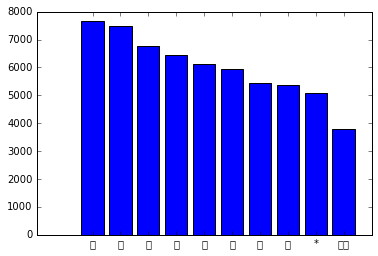

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array(range(10))
x_ticks = [ word for word, num in freq_counter.most_common(10)]
y = [ num for word, num in freq_counter.most_common(10)]

plt.bar(x, y, align="center")
plt.xticks(x, x_ticks)
plt.show()

### 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

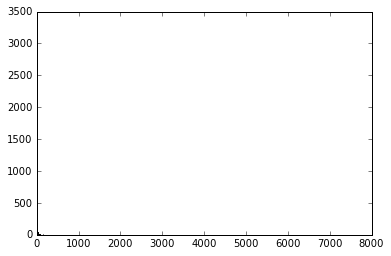

In [66]:
histgram_counter = Counter([ freq for _, freq in freq_counter.most_common()])
#for freq, word_num in histgram_counter.most_common(): print(freq, word_num)

x = np.array([freq for freq, word_num in histgram_counter.most_common()])
y = np.array([word_num for freq, word_num in histgram_counter.most_common()])
plt.bar(x, y, align="center")
plt.show()

### 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

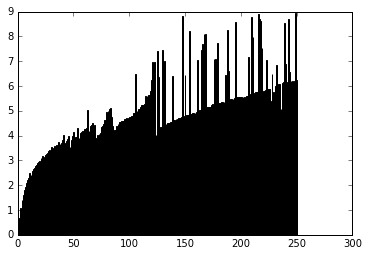

In [67]:
y = np.array([np.log(freq) for freq, word_num in histgram_counter.most_common()])
x = np.array(range(1, len(y) + 1))
plt.bar(x, y, align="center")
plt.show()